In [1]:
# import cv2
# import numpy as np
# from keras.models import model_from_json
# import keras.utils as image


# def classify_emotion(img, model, face_cascade):
#     """Classify the emotion of the detected faces in an image.
    
#     Args:
#         img: The input image as a numpy array.
#         model: The pre-trained Keras model for emotion classification.
#         face_cascade: The Haar cascade classifier for face detection.
        
#     Returns:
#         A list of tuples, where each tuple contains the bounding box coordinates (x, y, w, h) and the predicted emotion
#         of a face in the image.
#     """
#     # Convert image to grayscale
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Detect faces in the image
#     faces_detected = face_cascade.detectMultiScale(gray_img, 1.1, 6, minSize=(150, 150))
    
#     results = []
    
#     # Classify the emotion of each detected face
#     for (x, y, w, h) in faces_detected:
#         # Crop the face region from the grayscale image
#         roi_gray = gray_img[y:y + w, x:x + h]
#         # Resize the face region to 48x48 pixels
#         roi_gray = cv2.resize(roi_gray, (48, 48))
#         # Convert the face region to a 1D array
#         img_pixels = image.img_to_array(roi_gray)
#         # Expand the dimensions of the array to match the model input shape
#         img_pixels = np.expand_dims(img_pixels, axis=0)
#         # Normalize the pixel values
#         img_pixels /= 255.0
#         # Make a prediction with the model
#         predictions = model.predict(img_pixels)
#         # Get the index of the maximum predicted probability
#         max_index = int(np.argmax(predictions))
#         # Get the list of emotion labels
#         emotions = ['Neutro', 'Feliz', 'Surpreso', 'Triste', 'Raiva', 'Nojo', 'Medo']
#         # Get the predicted emotion label
#         predicted_emotion = emotions[max_index]
#         # Append the bounding box coordinates and the predicted emotion to the results list
#         results.append((x, y, w, h, predicted_emotion))
        
#     return results


# # Load the pre-trained Keras model from a JSON file
# json_file = open('model8267yolo.json', 'r') 
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # Load the model weights
# model.load_weights('model8267yolo.h5')

# # Load the Haar cascade classifier for face detection
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


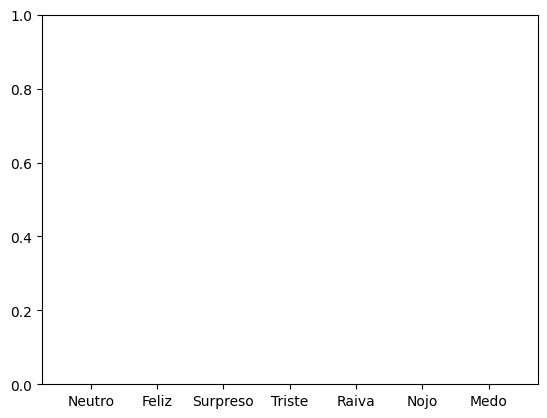

In [2]:
import cv2
import numpy as np
from keras.models import model_from_json
import keras.utils as image


   
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize the figure and axes object
fig, ax = plt.subplots()

# Set the x-axis labels and y-axis limits
emotions = ['Neutro', 'Feliz', 'Surpreso', 'Triste', 'Raiva', 'Nojo', 'Medo']
ax.set_xticks(range(len(emotions)))
ax.set_xticklabels(emotions)
ax.set_ylim([0, 1])

# Initialize a bar plot with empty data
bars = ax.bar(range(len(emotions)), [0] * len(emotions))

def animate(i):
    # Make a prediction with the emotion classifier
    predictions = emotion_classifier.predict(face_img)

    # Get the index of the dominant emotion
    max_index = int(np.argmax(predictions))

    # Update the y-values for each bar
    for j, bar in enumerate(bars):
        bar.set_height(predictions[j] if j == max_index else 0)



def classify_emotion(img, model, face_cascade):
    """Classify the emotion of the detected faces in an image.
    
    Args:
        img: The input image as a numpy array.
        model: The pre-trained Keras model for emotion classification.
        face_cascade: The Haar cascade classifier for face detection.
        
    Returns:
        A list of tuples, where each tuple contains the bounding box coordinates (x, y, w, h) and the predicted emotion
        of a face in the image.
    """
    # Convert image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces_detected = face_cascade.detectMultiScale(gray_img, 1.1, 6, minSize=(150, 150))
    
    results = []
    
    # Classify the emotion of each detected face
    for (x, y, w, h) in faces_detected:
        # Crop the face region from the grayscale image
        roi_gray = gray_img[y:y + w, x:x + h]
        # Resize the face region to 48x48 pixels
        roi_gray = cv2.resize(roi_gray, (48, 48))
        # Convert the face region to a 1D array
        img_pixels = image.img_to_array(roi_gray)
        # Expand the dimensions of the array to match the model input shape
        img_pixels = np.expand_dims(img_pixels, axis=0)
        # Normalize the pixel values
        img_pixels /= 255.0
        # Make a prediction with the model
        predictions = model.predict(img_pixels)
        # Get the index of the maximum predicted probability
        max_index = int(np.argmax(predictions))
        # Get the list of emotion labels
        emotions = ['Neutro', 'Feliz', 'Surpreso', 'Triste', 'Raiva', 'Nojo', 'Medo']
        # Get the predicted emotion label
        predicted_emotion = emotions[max_index]
        # Get the second most likely emotion by sorting the predictions in descending order
        # and getting the index of the second highest value
        predictions[0].sort()
        predicted_emotion2 = emotions[int(predictions[0][-2])]
        # Append the bounding box coordinates, the predicted emotion, and the second most likely emotion
        # to the results list
        results.append((x, y, w, h, predicted_emotion, predicted_emotion2))
        
        

    return results

json_file = open('./transfer-learning/transferlearning9150.json', 'r') 
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
model.load_weights('./transfer-learning/transferlearning9150.h5')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [3]:
# # Capture video frames from the default webcam
# cap = cv2.VideoCapture(0)

# while True:
#     # Read a frame from the video stream
#     ret, img = cap.read()
#     if not ret:
#         break

#     # Classify the emotion of the detected faces
#     results = classify_emotion(img, model, face_cascade)
    
#     # Draw rectangles around the detected faces and display the predicted emotion
#     for (x, y, w, h, emotion) in results:
#         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
#         cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_TRIPLEX, 0.75, (255, 255, 255), 2)
    
#     # Resize and display the image
#     resized_img = cv2.resize(img, (1000, 700))
#     cv2.imshow('Facial Emotion Recognition', resized_img)

#     # Break out of the loop if the user presses 'q'
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and destroy all windows
# cap.release()
# cv2.destroyAllWindows()


In [4]:

# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Capture video frames from the default webcam
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video stream
    ret, img = cap.read()
    if not ret:
        break

    # Classify the emotion of the detected faces
    results = classify_emotion(img, model, face_cascade)
    
    # Draw rectangles around the detected faces and display the predicted emotions
    for (x, y, w, h, emotion, emotion2) in results:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
        cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_TRIPLEX, 0.75, (255, 255, 255), 2)
                # Display the second most likely emotion below the first
        cv2.putText(img, emotion2, (int(x), int(y + 20)), cv2.FONT_HERSHEY_TRIPLEX, 0.75, (255, 255, 255), 2)
    
    # Resize and display the image
    resized_img = cv2.resize(img, (1000, 700))
    cv2.imshow('Facial Emotion Recognition', resized_img)

    ani = animation.FuncAnimation(fig, animate, interval=50)
    plt.show()
    # Break out of the loop if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 176ms/step


2022-12-28 20:25:25.259901: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/opt/homebrew/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


In [5]:
# import cv2

# # Load the model
# model_file = "ssd_mobilenet_v1_coco_2017_11_17.pb"
# config_file = "ssd_mobilenet_v1_coco_2017_11_17.pbtxt"
# net = cv2.dnn.readNetFromTensorflow(model_file, config_file)

# # Set the input size and mean values for the model
# in_size = (300, 300)
# mean = (127.5, 127.5, 127.5)

# # Read an image from the file
# image = cv2.imread("image.jpg")

# # Pre-process the image for the model
# blob = cv2.dnn.blobFromImage(image, 1.0, in_size, mean)

# # Run the model and get the predictions
# net.setInput(blob)
# predictions = net.forward()

# # Loop through the predictions and draw bounding boxes around the detected faces
# for i in range(predictions.shape[2]):
#     confidence = predictions[0, 0, i, 2]
#     if confidence > 0.5:
#         x1 = int(predictions[0, 0, i, 3] * image.shape[1])
#         y1 = int(predictions[0, 0, i, 4] * image.shape[0])
#         x2 = int(predictions[0, 0, i, 5] * image.shape[1])
#         y2 = int(predictions[0, 0, i, 6] * image.shape[0])
#         cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# # Display the image
# cv2.imshow("Facial Emotion Recognition", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [6]:
# import cv2
# import numpy as np
# from keras.models import model_from_json
# import keras.utils as image
# import matplotlib.pyplot as plt

# def classify_emotion(img, model, face_cascade):
#     """Classify the emotion of the detected faces in an image.
    
#     Args:
#         img: The input image as a numpy array.
#         model: The pre-trained Keras model for emotion classification.
#         face_cascade: The Haar cascade classifier for face detection.
        
#     Returns:
#         A list of tuples, where each tuple contains the bounding box coordinates (x, y, w, h) and the predicted emotion
#         of a face in the image.
#     """
#     # Convert image to grayscale
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Detect faces in the image
#     faces_detected = face_cascade.detectMultiScale(gray_img, 1.1, 6, minSize=(150, 150))
    
#     results = []
    
#     # Classify the emotion of each detected face
#     for (x, y, w, h) in faces_detected:
#         # Crop the face region from the grayscale image
#         roi_gray = gray_img[y:y + w, x:x + h]
#         # Resize the face region to 48x48 pixels
#         roi_gray = cv2.resize(roi_gray, (48, 48))
#         # Convert the face region to a 1D array
#         img_pixels = image.img_to_array(roi_gray)
#         # Expand the dimensions of the array to match the model input shape
#         img_pixels = np.expand_dims(img_pixels, axis=0)
#         # Normalize the pixel values
#         img_pixels /= 255.0
#         # Make a prediction with the model
#         predictions = model.predict(img_pixels)
#         # Get the list of emotion labels
#         emotions = ['Neutro', 'Feliz', 'Surpreso', 'Triste', 'Raiva', 'Nojo', 'Medo']
        
#         # Plot the predictions as a bar chart
#         plt.bar(emotions, predictions[0])
#         plt.show()
        
#         # Append the bounding box coordinates and the predicted emotion to the results list
#         results.append((x, y, w, h, emotions[np.argmax(predictions)]))
        
#     return results



In [7]:

# # Load the pre-trained Keras model from a JSON file
# json_file = open('model6973yolo.json', 'r') 
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # Load the model weights
# model.load_weights('model6973yolo.h5')

# # Load the Haar cascade classifier for face detection
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# # Capture video frames from the default webcam
# cap = cv2.VideoCapture(0)

# while True:
#     # Read a frame from the video stream
#     ret, img = cap.read()
#     if not ret:
#         break

#     # Classify the emotion of the detected faces
#     results = classify_emotion(img, model, face_cascade)
    
#     # Draw rectangles around the detected faces
#     for (x, y, w, h, emotion) in results:
#         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
#         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
#         cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_TRIPLEX, 0.75, (255, 255, 255), 2)
    
#     # Resize and display the image
#     resized_img = cv2.resize(img, (1000, 700))
#     cv2.imshow('Facial Emotion Recognition', resized_img)

#     # Break out of the loop if the user presses 'q'
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and destroy all windows
# cap.release()
# cv2.destroyAllWindows()


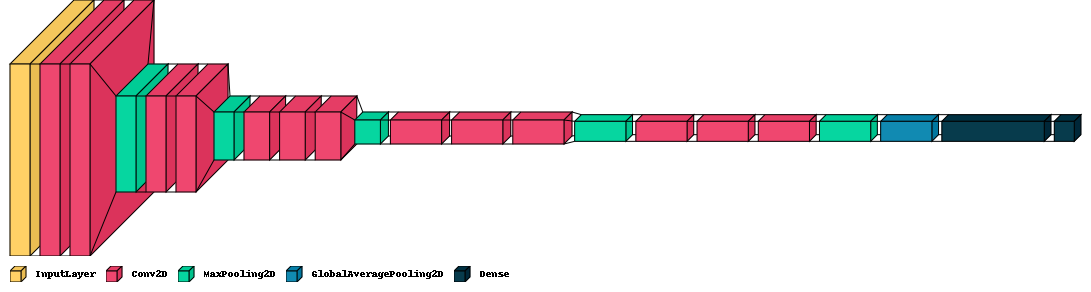

In [8]:
import visualkeras
visualkeras.layered_view(model, legend=True)

/opt/homebrew/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


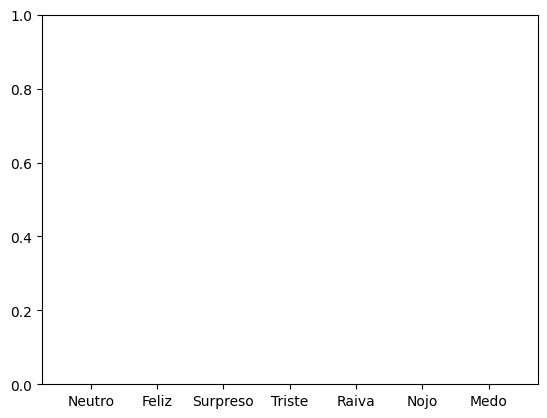

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize the figure and axes object
fig, ax = plt.subplots()

# Set the x-axis labels and y-axis limits
emotions = ['Neutro', 'Feliz', 'Surpreso', 'Triste', 'Raiva', 'Nojo', 'Medo']
ax.set_xticks(range(len(emotions)))
ax.set_xticklabels(emotions)
ax.set_ylim([0, 1])

# Initialize a bar plot with empty data
bars = ax.bar(range(len(emotions)), [0] * len(emotions))

def animate(i):
    # Make a prediction with the emotion classifier
    predictions = emotion_classifier.predict(face_img)

    # Get the index of the dominant emotion
    max_index = int(np.argmax(predictions))

    # Update the y-values for each bar
    for j, bar in enumerate(bars):
        bar.set_height(predictions[j] if j == max_index else 0)

# Animate the figure
ani = animation.FuncAnimation(fig, animate, interval=50)
plt.show()

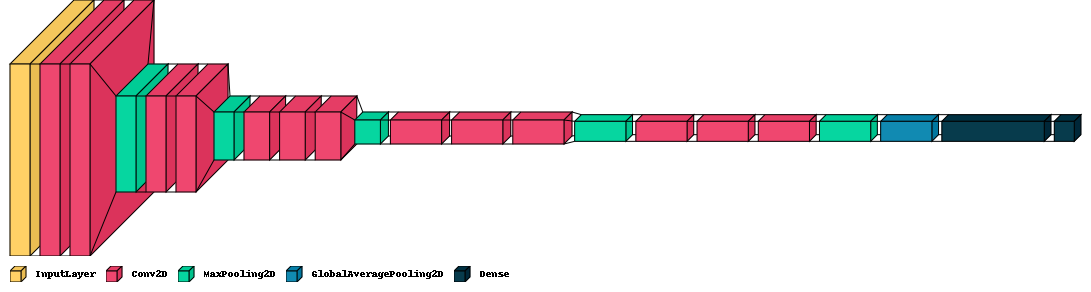

In [10]:
import visualkeras
visualkeras.layered_view(model, legend=True)

1/1 [==============================] - 0s 24ms/step


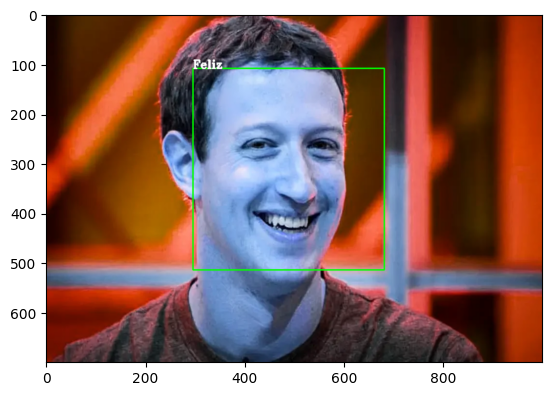

: 

In [11]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# img = cv2.imread('mark.jpeg')
img = cv2.imread('marksmile.webp')
results = classify_emotion(img, model, face_cascade)

for (x, y, w, h, emotion, emotion2) in results:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
    cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_TRIPLEX, 0.75, (255, 255, 255), 2)
    # cv2.putText(img, emotion2, (int(x), int(y)), cv2.FONT_HERSHEY_TRIPLEX, 0.75, (255, 255, 255), 2)

# cv2.imshow('Facial Emotion Recognition', img)
resized_img = cv2.resize(img, (1000, 700))
cv2.imshow('Facial Emotion Recognition', resized_img)
plt.imshow(resized_img, cmap='gray')
plt.show()